In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
car = pd.read_csv("Car_Price_Prediction.csv")

car.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### Exploratory Data Analysis

#### Understanding the data

In [3]:
car.shape

(8128, 13)

In [4]:
car.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
car.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
car.nunique()

name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         322
torque            441
seats               9
dtype: int64

In [8]:
car.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [9]:
# print(car["name"].unique().tolist())
# print("-------------------------------------------------------------------")
# print(car["seats"].unique().tolist())
# print("-------------------------------------------------------------------")
# print(car["mileage"].unique().tolist())
# print("-------------------------------------------------------------------")
# print(car["engine"].unique().tolist())
# print("-------------------------------------------------------------------")
# print(car["max_power"].unique().tolist())
# print("-------------------------------------------------------------------")
# print(car["torque"].unique().tolist())

#### Data cleaning

In [10]:
# Separate the brand name from the name column
car[["brand", "model"]] = car['name'].str.split(' ', n=1, expand=True)

In [11]:
# split the engine column
# first convert the entries in the wrong unit, that is, change km/kg to kmpl.
# find the rows with units km/kg

fuel_type = car[car["mileage"].str.contains("km/kg", na=False)]
fuel_type["model"].unique()

array(['Wagon R LXI DUO BSIII', 'Alto 800 CNG LXI Optional',
       'Wagon R LXI LPG BSIV', 'Wagon R LXI CNG', 'Eeco CNG 5 Seater AC',
       'Alto 800 CNG LXI', 'Wagon R Duo Lxi', 'Eeco CNG 5 Seater AC BSIV',
       'Santro Xing GLS LPG', 'Wagon R CNG LXI', 'Santro Xing GLS CNG',
       'Zen Estilo LXI Green (CNG)', 'Indica V2 Emax CNG GLX',
       'i10 Sportz 1.1L LPG', 'Santro Xing GL LPG',
       'Omni LPG CARGO BSIII W IMMOBILISER', 'i10 Magna LPG',
       'EON LPG Era Plus', 'Omni CNG', 'Eeco CNG HTR 5-STR',
       'Accent Executive CNG', 'SX4 Green Vxi (CNG)', '800 AC LPG',
       'Spark 1.0 PS LPG', 'Ertiga VXI CNG Limited Edition',
       'Alto K10 LXI CNG', 'Accent GLE CNG', 'Alto 800 LXI CNG',
       'i10 LPG', 'Wagon R LXI CNG Optional', 'Santro Xing GL Plus LPG',
       'Accent Executive LPG', 'Wagon R LXI DUO BS IV',
       'Alto Green LXi (CNG)', 'Spark 1.0 LT LPG',
       'Eeco 5 STR With AC Plus HTR CNG'], dtype=object)

There are both CNG and LPG models, and do not have the same conversion factor.

CNG is stored under high pressure, typically around 200 bar or 250 bar, and its density varies with pressure and temperature. At standard temperature and pressure, natural gas has a density of approximately 0.7-0.9 kg/m³, depending on its composition. However, when compressed to 200 bar, the density increases to roughly 180 kg/m³, and at 250 bar, around 215 kg/m³ for a typical methane-rich composition. For conversion purposes, it is best to use a density relevant to the dispensing pressure. A density of 180 kg/m³ (equivalent to 0.18 kg/L) at 200 bar is a common approximation.

On the other hand, LPG is a mixture of propane and butane, and its density can vary slightly based on the mixture and temperature. The density of liquid LPG is typically around 0.5–0.58 kg/L. A commonly used value for conversion is approximately 0.51 kg/L.

In [12]:
# Extract the numerical part of the mileage
car['mileage_numerical'] = car['mileage'].str.extract(r'(\d+\.?\d*)').astype(float)

# Make a copy of the numerical mileage.
car['converted_mileage'] = car['mileage_numerical'].copy()

# Multiply the mileage with the conversion factor (0.18) for 'km/kg' and 'CNG' cars
cng_condition = car['mileage'].str.contains('km/kg', na=False) & car['model'].str.contains('CNG', na=False)
car.loc[cng_condition, 'converted_mileage'] = car.loc[cng_condition, 'mileage_numerical'] * 0.18

# Apply the second conversion factor (0.51) for 'km/kg' and NOT 'CNG' cars
non_cng_condition = car['mileage'].str.contains('km/kg', na=False) & ~car['model'].str.contains('CNG', na=False)
car.loc[non_cng_condition, 'converted_mileage'] = car.loc[non_cng_condition, 'mileage_numerical'] * 0.51


car[['model', 'mileage', 'converted_mileage']].head(10)

,model,mileage,converted_mileage
0,Swift Dzire VDI,23.4 kmpl,23.400
1,Rapid 1.5 TDI Ambition,21.14 kmpl,21.140
2,City 2017-2020 EXi,17.7 kmpl,17.700
3,i20 Sportz Diesel,23.0 kmpl,23.000
4,Swift VXI BSIII,16.1 kmpl,16.100
5,Xcent 1.2 VTVT E Plus,20.14 kmpl,20.140
6,Wagon R LXI DUO BSIII,17.3 km/kg,8.823
7,800 DX BSII,16.1 kmpl,16.100
8,Etios VXD,23.59 kmpl,23.590
9,Figo Diesel Celebration Edition,20.0 kmpl,20.000


In [13]:
car[["engine_size", "engine_unit"]] = car["engine"].str.split(" ", expand=True)

In [14]:
car[["max_power_num", "max_power_unit"]] = car["max_power"].str.split(" ", expand=True)

In [15]:
import re

The torque column contains torque values in kgm and Nm. Also, the rpm values are mixed with the torque; hence, will need to be separated. Some rpm values are in ranges as well. This column needs to be properly cleaned and split. The mean of the rpm values in range will be calculated.

1 kilogram-force meter (kgf·m) is approximately equal to 9.80665 Newton-meters (N·m). Therefore, 1 kilogram-force (kgf) = 9.80665 Newtons (N).

In [16]:
Kgm_to_Nm = 9.80665

def torque_and_rpm(torque_str): # Cleans a torque string to extract numerical values and returns (torque_Nm, mean_rpm) or (None, None) if parsing fails.
    if not isinstance(torque_str, str):
        return None, None

    s = torque_str.lower().replace(' at ', '@').replace(' ', '').replace(',', '') # Standardize the string for easier regex matching
    match = re.search(r'(\d+\.?\d*)\s*(?:nm|kgm)?.*?@(\d+)-?(\d+)?.*', s)
    
    if match:
        torque_val = float(match.group(1))
        # Check if the unit is 'kgm' and convert if necessary
        if 'kgm' in s:
            torque_val *= Kgm_to_Nm
            
        rpm_start = int(match.group(2))
        rpm_end_str = match.group(3)
        
        if rpm_end_str:
            mean_rpm = (rpm_start + int(rpm_end_str)) / 2
        else:
            mean_rpm = float(rpm_start) 
        return torque_val, mean_rpm        
    return None, None

car[['torque_Nm', 'mean_rpm']] = car['torque'].apply(lambda x: pd.Series(torque_and_rpm(x)))
car[['torque', 'torque_Nm', 'mean_rpm']]

,torque,torque_Nm,mean_rpm
0,190Nm@ 2000rpm,190.000000,2000.0
1,250Nm@ 1500-2500rpm,250.000000,2000.0
2,"12.7@ 2,700(kgm@ rpm)",124.544455,2700.0
3,22.4 kgm at 1750-2750rpm,219.668960,2250.0
4,"11.5@ 4,500(kgm@ rpm)",112.776475,4500.0
...,...,...,...
8123,113.7Nm@ 4000rpm,113.700000,4000.0
8124,"24@ 1,900-2,750(kgm@ rpm)",235.359600,2325.0
8125,190Nm@ 2000rpm,190.000000,2000.0
8126,140Nm@ 1800-3000rpm,140.000000,2400.0


In [17]:
# Drop the unwanted columns
car.drop(["name", "engine_unit", "mileage", "engine", "torque", "max_power", "max_power_unit",], axis=1, inplace=True)

In [18]:
car.head(3)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,brand,model,mileage_numerical,converted_mileage,engine_size,max_power_num,torque_Nm,mean_rpm
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,Maruti,Swift Dzire VDI,23.40,23.40,1248,74,190.000000,2000.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,Skoda,Rapid 1.5 TDI Ambition,21.14,21.14,1498,103.52,250.000000,2000.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,Honda,City 2017-2020 EXi,17.70,17.70,1497,78,124.544455,2700.0


In [19]:
car.dtypes

year                   int64
selling_price          int64
km_driven              int64
fuel                  object
seller_type           object
transmission          object
owner                 object
seats                float64
brand                 object
model                 object
mileage_numerical    float64
converted_mileage    float64
engine_size           object
max_power_num         object
torque_Nm            float64
mean_rpm             float64
dtype: object

In [20]:
# Convert numerical columns to numerical dtypes
car['max_power_num'] = car['max_power_num'].replace('', np.nan)
car['max_power_num'] = car["max_power_num"].astype("float")
car["engine_size"] = car["engine_size"].astype("float")

##### Handle missing values

In [21]:
car.isnull().sum()

year                   0
selling_price          0
km_driven              0
fuel                   0
seller_type            0
transmission           0
owner                  0
seats                221
brand                  0
model                  0
mileage_numerical    221
converted_mileage    221
engine_size          221
max_power_num        216
torque_Nm            264
mean_rpm             264
dtype: int64

I chose to impute the missing values instead of dropping them. I would use the KNNImputer model, which will take the mean of surrounding values to make the imputation.

In [22]:
from sklearn.impute import KNNImputer

In [23]:
missing_numericals = ["mileage_numerical", "converted_mileage", "engine_size", "max_power_num", "torque_Nm", "mean_rpm"]

impute_car = car[missing_numericals]

In [24]:
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(impute_car)

imputed_df = pd.DataFrame(imputed_data, columns=missing_numericals)
car[missing_numericals] = imputed_df[missing_numericals]

In [25]:
# Fill in the missing values with the median
seat_med = car["seats"].median()
car["seats"] = car["seats"].replace(" ", np.nan).fillna(seat_med)

In [26]:
# Confirm that all null values are completely handled
car.isnull().sum()

year                 0
selling_price        0
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
seats                0
brand                0
model                0
mileage_numerical    0
converted_mileage    0
engine_size          0
max_power_num        0
torque_Nm            0
mean_rpm             0
dtype: int64

In [27]:
# confirm datatypes
car.dtypes

year                   int64
selling_price          int64
km_driven              int64
fuel                  object
seller_type           object
transmission          object
owner                 object
seats                float64
brand                 object
model                 object
mileage_numerical    float64
converted_mileage    float64
engine_size          float64
max_power_num        float64
torque_Nm            float64
mean_rpm             float64
dtype: object

### Univariate analysis

In [28]:
cars_num = ['owner','brand','model','transmission','fuel','year', 'seller_type','log_selling_price', 'km_driven','seats', 'mileage_numerical', 'converted_mileage',
            'engine_size', 'max_power_num', 'torque_Nm', 'mean_rpm']

In [29]:
from scipy.stats import skew

In [30]:
# Make the selling price symmetrical, and reduce the right skewness; this is because it is my target column

car['log_selling_price'] = np.log1p(car['selling_price'])

In [31]:
cars_nums = [ "log_selling_price", 'km_driven','seats', 'converted_mileage',
            'engine_size', 'max_power_num', 'torque_Nm', 'mean_rpm']

log_selling_price


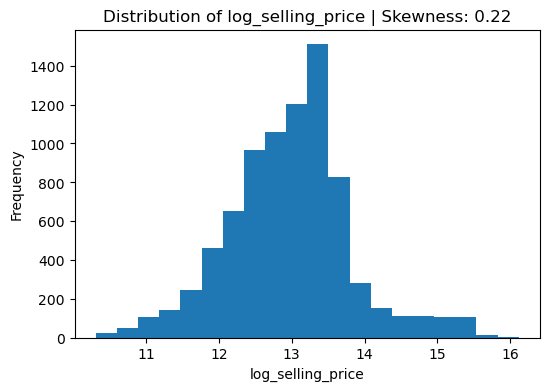

km_driven


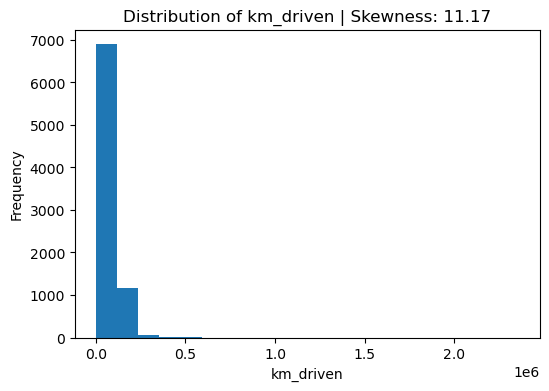

seats


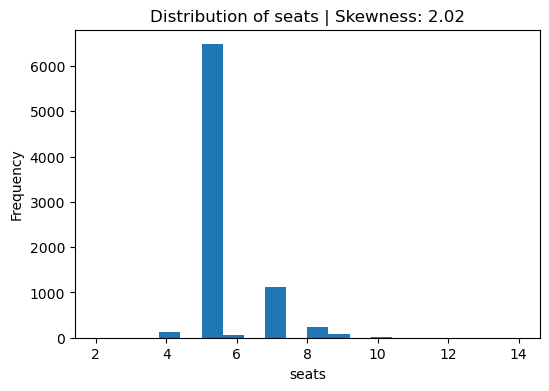

converted_mileage


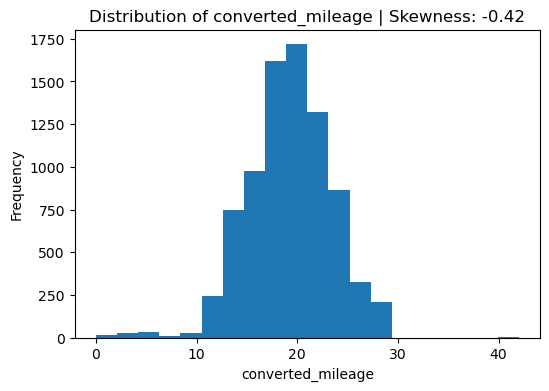

engine_size


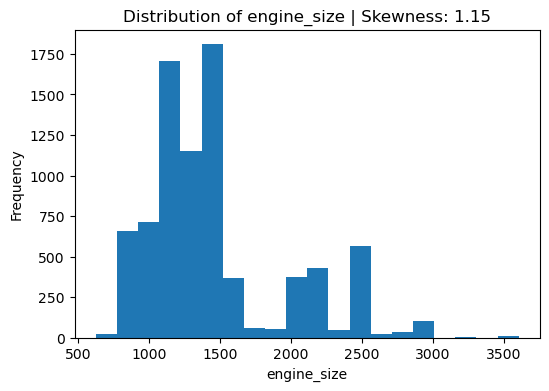

max_power_num


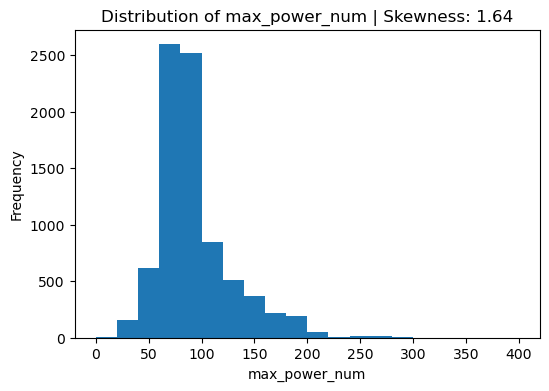

torque_Nm


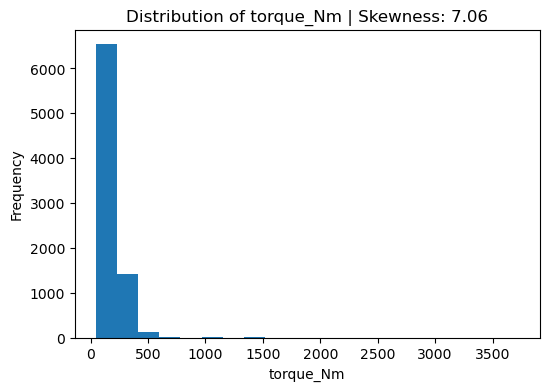

mean_rpm


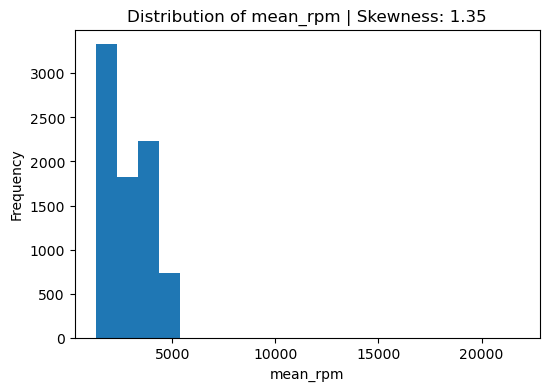

In [32]:
# Check the distribution of the numerical columns

for col in cars_nums:
    print(col)

    plt.figure(figsize=(6,4))
    plt.hist(car[col], bins=20)
    plt.title(f"Distribution of {col} | Skewness: {round(car[col].skew(), 2)}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [33]:
cars_num_df = car[cars_num]

In [34]:
cars_num_df

,owner,brand,model,transmission,fuel,year,seller_type,log_selling_price,km_driven,seats,mileage_numerical,converted_mileage,engine_size,max_power_num,torque_Nm,mean_rpm
0,First Owner,Maruti,Swift Dzire VDI,Manual,Diesel,2014,Individual,13.017005,145500,5.0,23.40,23.40,1248.0,74.00,190.000000,2000.0
1,Second Owner,Skoda,Rapid 1.5 TDI Ambition,Manual,Diesel,2014,Individual,12.821261,120000,5.0,21.14,21.14,1498.0,103.52,250.000000,2000.0
2,Third Owner,Honda,City 2017-2020 EXi,Manual,Petrol,2006,Individual,11.970357,140000,5.0,17.70,17.70,1497.0,78.00,124.544455,2700.0
3,First Owner,Hyundai,i20 Sportz Diesel,Manual,Diesel,2010,Individual,12.323860,127000,5.0,23.00,23.00,1396.0,90.00,219.668960,2250.0
4,First Owner,Maruti,Swift VXI BSIII,Manual,Petrol,2007,Individual,11.775297,120000,5.0,16.10,16.10,1298.0,88.20,112.776475,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,First Owner,Hyundai,i20 Magna,Manual,Petrol,2013,Individual,12.676079,110000,5.0,18.50,18.50,1197.0,82.85,113.700000,4000.0
8124,Fourth & Above Owner,Hyundai,Verna CRDi SX,Manual,Diesel,2007,Individual,11.813037,119000,5.0,16.80,16.80,1493.0,110.00,235.359600,2325.0
8125,First Owner,Maruti,Swift Dzire ZDi,Manual,Diesel,2009,Individual,12.853179,120000,5.0,19.30,19.30,1248.0,73.90,190.000000,2000.0
8126,First Owner,Tata,Indigo CR4,Manual,Diesel,2013,Individual,12.577640,25000,5.0,23.57,23.57,1396.0,70.00,140.000000,2400.0


In [35]:
# cars_num_df.drop('mileage_numerical', axis=1, inplace = True)

### Bivariate analysis

<Figure size 1000x600 with 0 Axes>

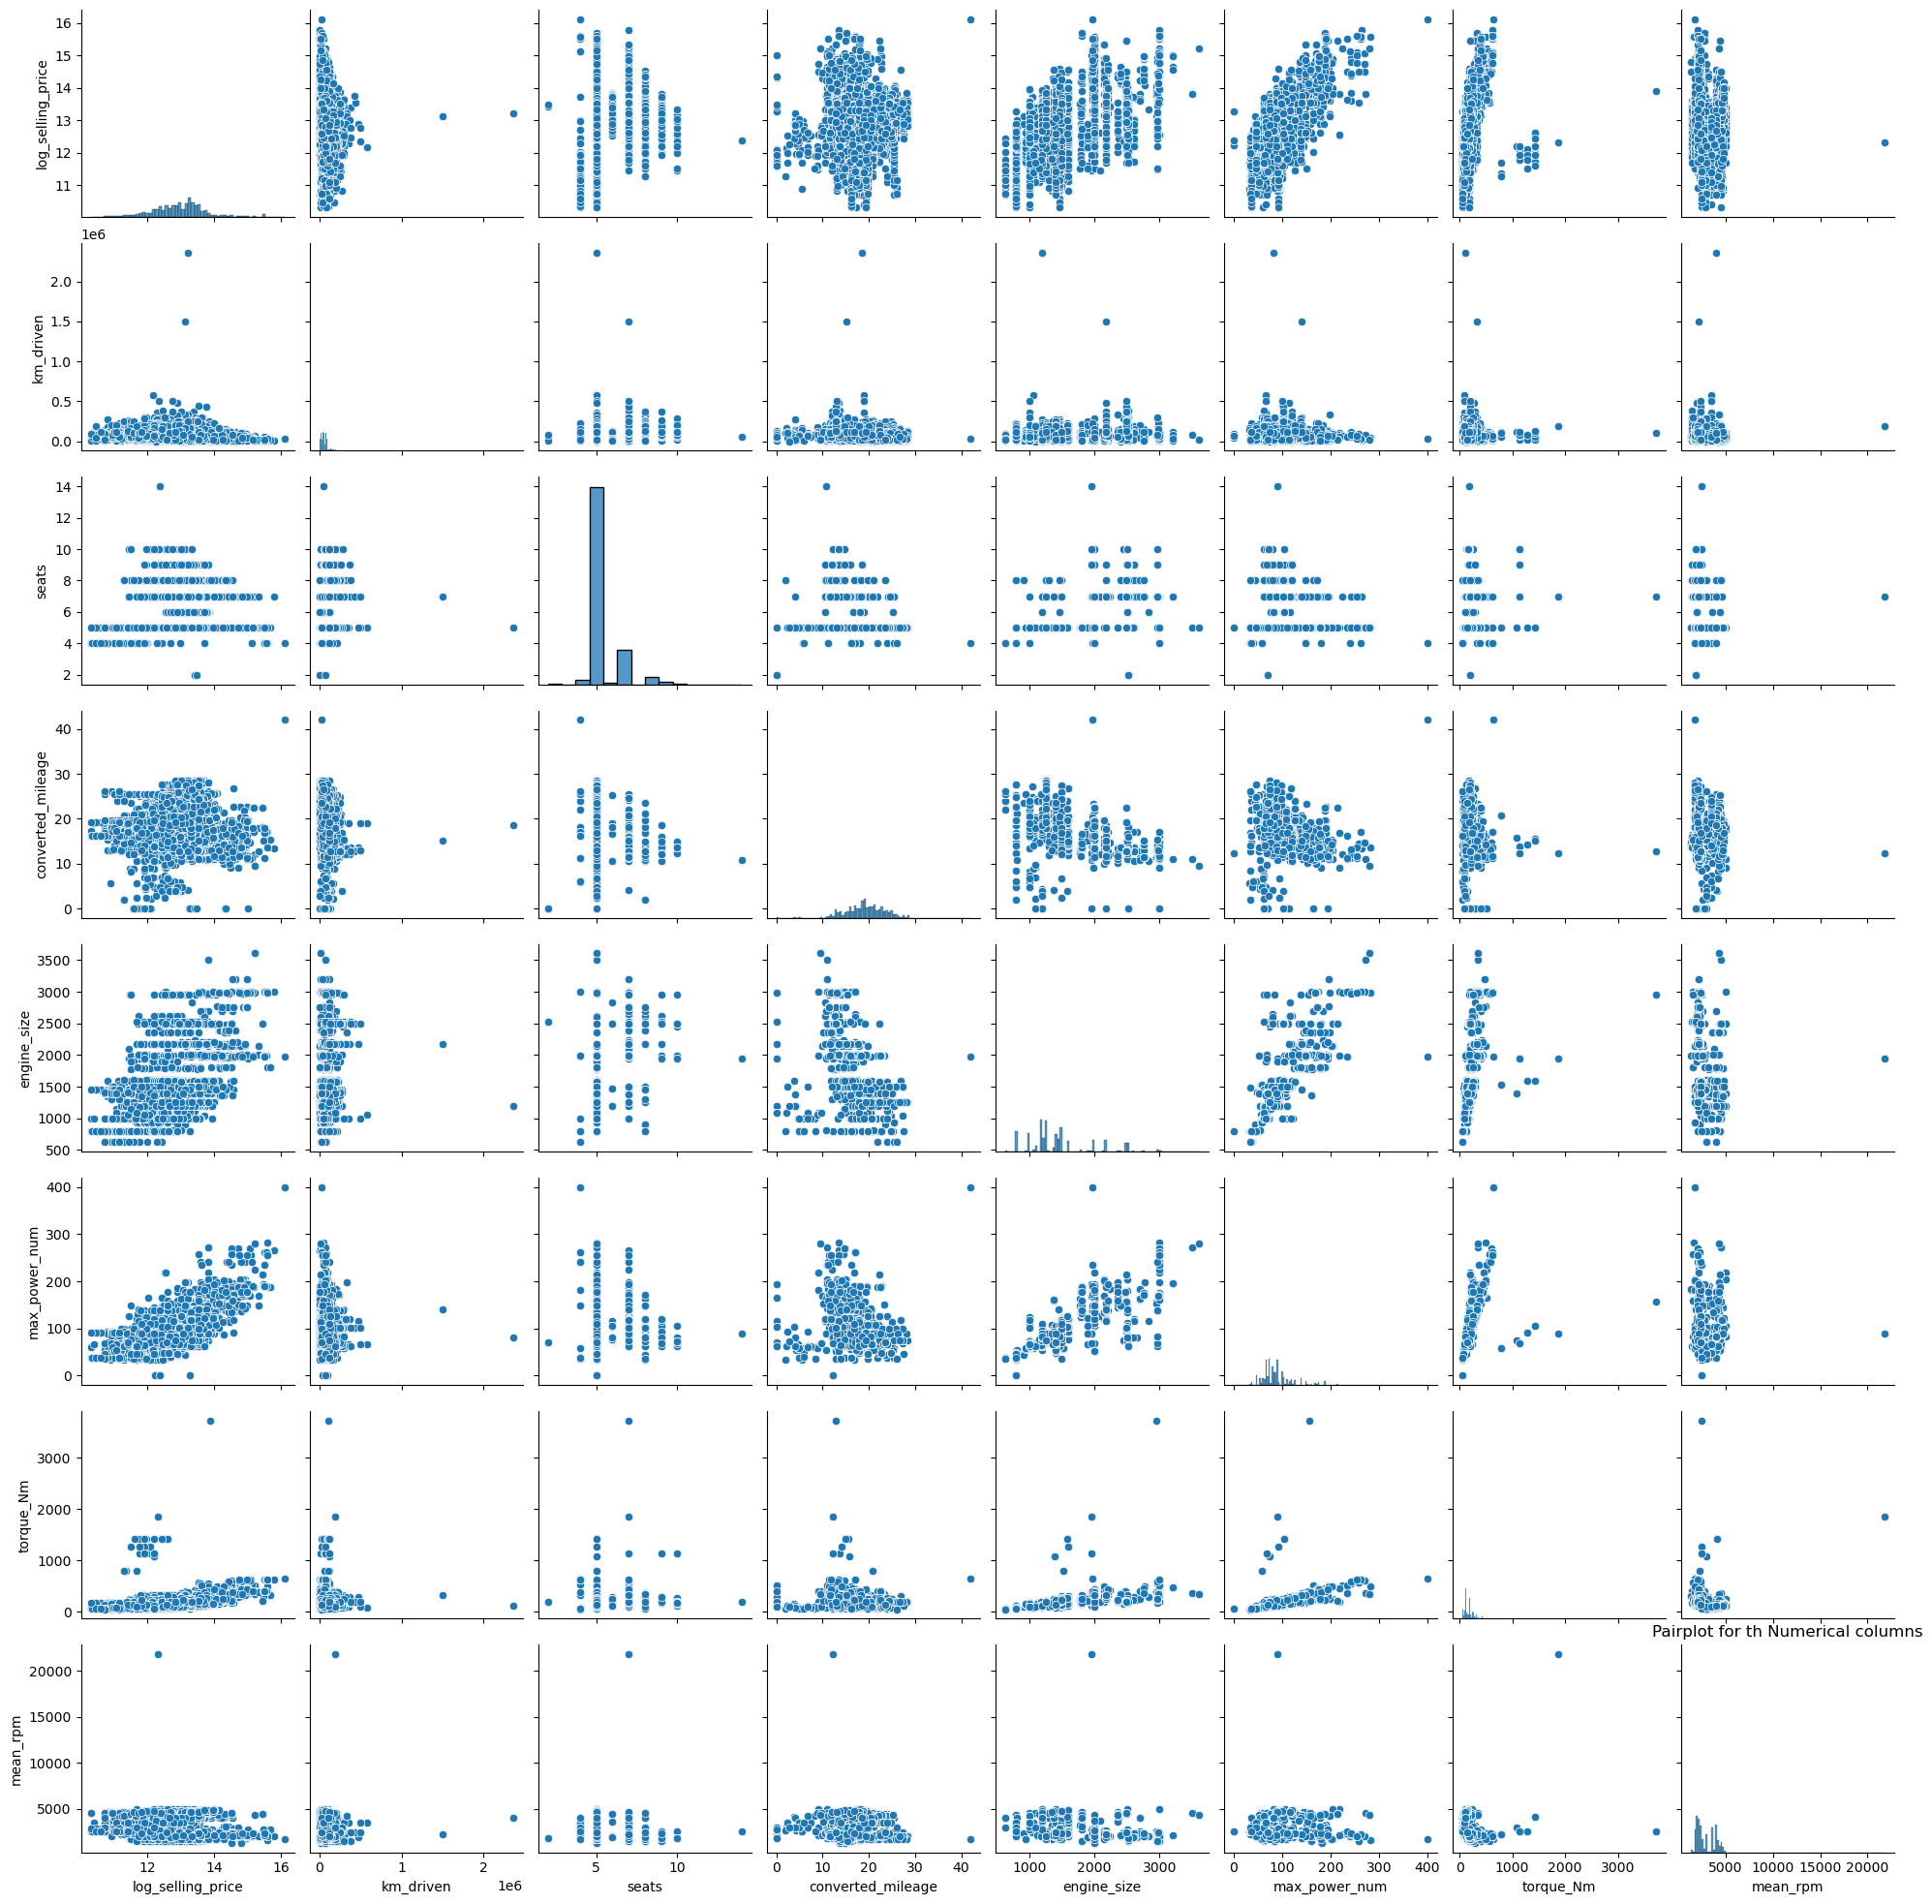

In [36]:
plt.figure(figsize=(10,6))

sns.pairplot(car[cars_nums])
plt.title("Pairplot for th Numerical columns")

plt.show()

In [37]:
cars_nums_df = car[cars_nums]

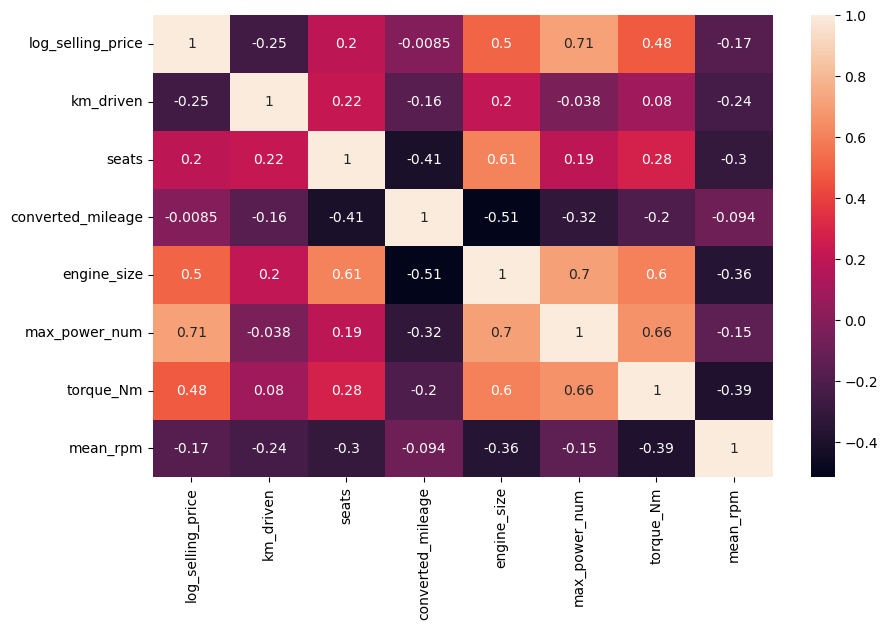

In [38]:
# Plot the correlation o the numerical columns
plt.figure(figsize=(10,6))

sns.heatmap(cars_nums_df.corr(), annot=True)
plt.show()

In [39]:
# cars_num_df.corr()

In [40]:
cars_num_df.columns

Index(['owner', 'brand', 'model', 'transmission', 'fuel', 'year',
       'seller_type', 'log_selling_price', 'km_driven', 'seats',
       'mileage_numerical', 'converted_mileage', 'engine_size',
       'max_power_num', 'torque_Nm', 'mean_rpm'],
      dtype='object')

<Axes: >

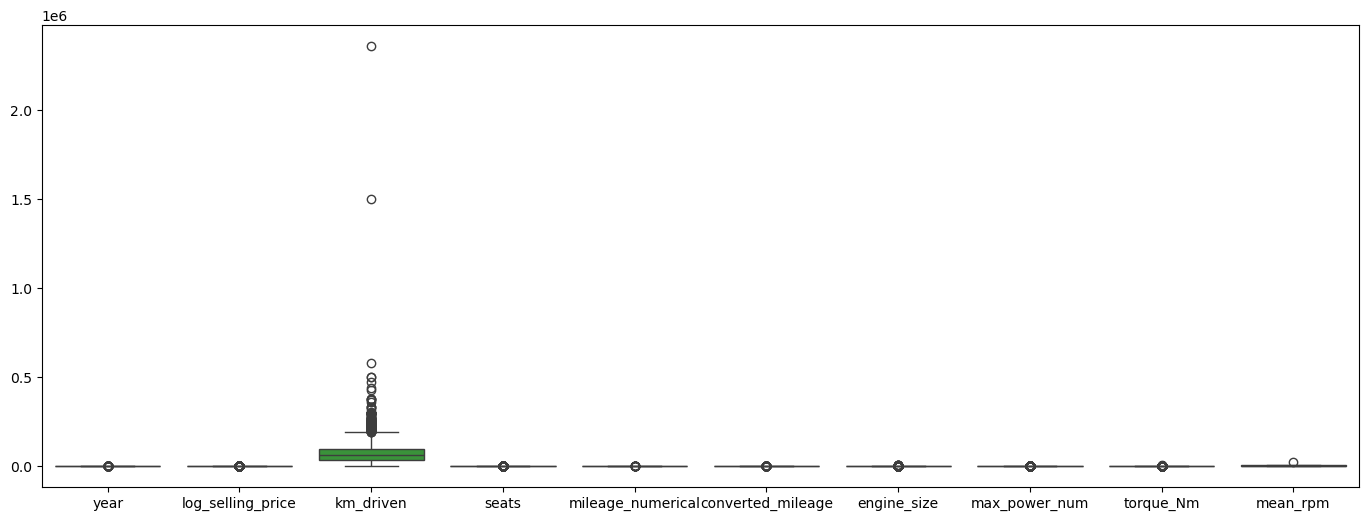

In [41]:
plt.figure(figsize=(17,6))
sns.boxplot(data=cars_num_df)

#### Feature engineering

In [43]:
cars_num_df.dtypes

owner                 object
brand                 object
model                 object
transmission          object
fuel                  object
year                   int64
seller_type           object
log_selling_price    float64
km_driven              int64
seats                float64
mileage_numerical    float64
converted_mileage    float64
engine_size          float64
max_power_num        float64
torque_Nm            float64
mean_rpm             float64
dtype: object

In [44]:
categorical_cols = ['owner', 'brand', 'model', 'transmission', 'fuel', 'seller_type']

numerical_cols = ['year', 'km_driven', 'seats', 'converted_mileage',
                  'engine_size', 'max_power_num', 'torque_Nm', 'mean_rpm']

In [45]:
cars_num_df.columns

Index(['owner', 'brand', 'model', 'transmission', 'fuel', 'year',
       'seller_type', 'log_selling_price', 'km_driven', 'seats',
       'mileage_numerical', 'converted_mileage', 'engine_size',
       'max_power_num', 'torque_Nm', 'mean_rpm'],
      dtype='object')

In [46]:
cars_num_df.isnull().sum()

owner                0
brand                0
model                0
transmission         0
fuel                 0
year                 0
seller_type          0
log_selling_price    0
km_driven            0
seats                0
mileage_numerical    0
converted_mileage    0
engine_size          0
max_power_num        0
torque_Nm            0
mean_rpm             0
dtype: int64

In [47]:
print(cars_num_df[numerical_cols + categorical_cols].isnull().sum())

year                 0
km_driven            0
seats                0
converted_mileage    0
engine_size          0
max_power_num        0
torque_Nm            0
mean_rpm             0
owner                0
brand                0
model                0
transmission         0
fuel                 0
seller_type          0
dtype: int64


In [48]:
cars_num_df.head(10)

,owner,brand,model,transmission,fuel,year,seller_type,log_selling_price,km_driven,seats,mileage_numerical,converted_mileage,engine_size,max_power_num,torque_Nm,mean_rpm
0,First Owner,Maruti,Swift Dzire VDI,Manual,Diesel,2014,Individual,13.017005,145500,5.0,23.40,23.400,1248.0,74.00,190.000000,2000.0
1,Second Owner,Skoda,Rapid 1.5 TDI Ambition,Manual,Diesel,2014,Individual,12.821261,120000,5.0,21.14,21.140,1498.0,103.52,250.000000,2000.0
2,Third Owner,Honda,City 2017-2020 EXi,Manual,Petrol,2006,Individual,11.970357,140000,5.0,17.70,17.700,1497.0,78.00,124.544455,2700.0
3,First Owner,Hyundai,i20 Sportz Diesel,Manual,Diesel,2010,Individual,12.323860,127000,5.0,23.00,23.000,1396.0,90.00,219.668960,2250.0
4,First Owner,Maruti,Swift VXI BSIII,Manual,Petrol,2007,Individual,11.775297,120000,5.0,16.10,16.100,1298.0,88.20,112.776475,4500.0
5,First Owner,Hyundai,Xcent 1.2 VTVT E Plus,Manual,Petrol,2017,Individual,12.994532,45000,5.0,20.14,20.140,1197.0,81.86,113.750000,4000.0
6,First Owner,Maruti,Wagon R LXI DUO BSIII,Manual,LPG,2007,Individual,11.472114,175000,5.0,17.30,8.823,1061.0,57.50,76.491870,4500.0
7,Second Owner,Maruti,800 DX BSII,Manual,Petrol,2001,Individual,10.714440,5000,4.0,16.10,16.100,796.0,37.00,59.000000,2500.0
8,First Owner,Toyota,Etios VXD,Manual,Diesel,2011,Individual,12.765691,90000,5.0,23.59,23.590,1364.0,67.10,170.000000,2100.0
9,First Owner,Ford,Figo Diesel Celebration Edition,Manual,Diesel,2013,Individual,12.206078,169000,5.0,20.00,20.000,1399.0,68.10,160.000000,2000.0


In [49]:
cars_num_df.shape

(8128, 16)

In [50]:
# from sklearn.preprocessing import LabelEncoder

In [51]:
# le = LabelEncoder()
# category = ['owner', 'brand', 'model', 'transmission','fuel','seller_type']
# for col in category:
#      cars_cars[col] = le.fit_transform(cars_cars[col])

In [53]:
from sklearn.preprocessing import OrdinalEncoder

In [54]:
# Define the categorical columns
categorical_cols = ['transmission', 'owner', 'brand', 'model', 'seller_type', 'fuel']
# Create the encoder
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [55]:
# Fit on training data
ordinal_encoder.fit(cars_num_df[categorical_cols])
# Create the encoder
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [56]:
# Fit on training data
ordinal_encoder.fit(cars_num_df[categorical_cols])
# Transform and replace the original columns
cars_num_df.loc[:, categorical_cols] = ordinal_encoder.transform(cars_num_df[categorical_cols])

In [58]:
cars_cars = pd.DataFrame(cars_num_df)

In [59]:
cars_cars.drop("mileage_numerical", axis=1, inplace=True)

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
x = cars_cars.drop('log_selling_price', axis =1)

In [62]:
y = cars_cars['log_selling_price']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [64]:
Model = RandomForestRegressor()

In [65]:
Model.fit(x_train,y_train)

RandomForestRegressor()

In [66]:
Model.score(x_test,y_test)

0.939173323922922

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [68]:
y_pred = Model.predict(x_test)

In [69]:
y_pred

array([13.82567512, 13.02932195, 13.05479074, ..., 13.08170361,
       12.4408624 , 13.03466608])

In [70]:
mae = mean_absolute_error(y_pred,y_test)

In [71]:
mae

0.137253346737368

In [72]:
mse = mean_squared_error(y_pred,y_test)

In [73]:
mse

0.04384996531014061

In [74]:
r2 = r2_score(y_pred,y_test)

In [75]:
r2

0.9360323748549163

In [76]:
import joblib

In [77]:
owner_encoder = joblib.dump(ordinal_encoder, 'owner_encoder.pkl')

In [78]:
fuel_encoder = joblib.dump(ordinal_encoder, 'fuel_encoder.pkl')

In [79]:
brand_encoder = joblib.dump(ordinal_encoder, 'brand_encoder.pkl')

In [80]:
model_encoder = joblib.dump(ordinal_encoder, 'model_encoder.pkl')

In [81]:
transmission_encoder = joblib.dump(ordinal_encoder, 'transmission_encoder.pkl')


In [82]:
seller_type_encoder = joblib.dump(ordinal_encoder, 'seller_type_encoder.pkl')

In [83]:
ordinal_encoder = joblib.dump(ordinal_encoder, "ordinal_encoder.pkl")

In [ ]:
cars_cars.columns

In [ ]:
e = joblib.dump(le, "LabelEncoder.pkl")

In [ ]:
# # Step 1: Check for missing values

# # Step 2: Fit and transform the data
# transformed_data = preprocessor.fit_transform(cars_num_df)

# # Step 3: Fit the model
# model_pipeline.fit(cars_num_df.drop(columns='log_selling_price'), cars_num_df['log_selling_price'])


In [ ]:
# # Instantiate transformers
# ohe = OneHotEncoder()
# scaler = StandardScaler()

# # Create a robust preprocessor that explicitly handles all columns
# preprocessor = ColumnTransformer(
#     transformers=[('num', StandardScaler(), numerical_cols),
#         ('cat', OneHotEncoder(drop='first'), categorical_cols)])

# # transformed_data = preprocessor.fit_transform(cars_num_df)
# # Fit and transform the entire DataFrame
# # transformed_data = preprocessor.fit_transform(cars_num_df)

In [ ]:
# Cars_num_df = preprocessor.fit_transform(cars_num_df)

In [ ]:
# df = pd.DataFrame(Cars_num_df,cars_num_df['log_selling_price'])

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestRegressor

In [ ]:
# model_pipeline = Pipeline(steps=[('preprocessing', df),
#                                  ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
# df.shape

In [ ]:
# # Get the new column names for all transformed features
# onehot_feature_names = preprocessor.named_transformers_['onehotencoder'].get_feature_names_out(categorical_cols)
# scaler_feature_names = preprocessor.named_transformers_['standardscaler'].get_feature_names_out(numerical_cols)
# all_feature_names = np.concatenate([onehot_feature_names, scaler_feature_names])

# # Create the final DataFrame
# transformed_df = pd.DataFrame(transformed_data, columns=all_feature_names)
# transformed_df.head()

In [ ]:
 # transformed_df = pd.DataFrame(transformed_data, columns=all_feature_names)

In [ ]:
# x = df.drop(columns=["log_selling_price"])
# y = df["log_selling_price"]

In [ ]:
# x

In [ ]:
# y

In [ ]:
# Split the data into 80% training and 20% testing sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
# model_pipeline.fit(x_train,y_train);

In [ ]:
# model_pipeline.score(x_test, y_test)

In [ ]:
# # Make predictions on the test set (the predictions are on a log scale)
# y_pred_log = model.predict(x_test)

# # Convert the predictions back to the original price scale
# y_pred = np.expm1(y_pred_log)

In [ ]:
# # Also inverse transform the actual test values to calculate metrics correctly
# y_test_original = np.expm1(y_test)

In [ ]:
# # Evaluate the model with the original-scaled values
# mae = mean_absolute_error(y_test_original, y_pred)
# r2 = r2_score(y_test_original, y_pred)

# print(f"Mean Absolute Error: {mae:.2f}")
# print(f"R-squared: {r2:.2f}")

#### Try another model: use RandomForest

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
# # Initialize the Random Forest Regressor model
# model1 = RandomForestRegressor(n_estimators=25, random_state=42, max_depth=15, min_samples_leaf=10, max_leaf_nodes=10)

In [ ]:
# # Train the model using the training data
# model1.fit(x_train, y_train);

In [ ]:
# model1.score(x_test, y_test)

In [ ]:
# # Make predictions on the test set
# y_pred_log1 = model1.predict(x_test) # The predictions are on a log scale

In [ ]:
# # Inverse transform the predictions and test values
# y_pred1 = np.expm1(y_pred_log1)
# y_test_original1 = np.expm1(y_test)

In [ ]:
# # Evaluate model's performance
# mae1 = mean_absolute_error(y_test_original1, y_pred1)
# r2 = r2_score(y_test_original1, y_pred1)

# print("Random Forest Regressor Performance:")
# print(f"Mean Absolute Error: {mae:.2f}")
# print(f"R-squared: {r2:.2f}")

In [ ]:
# import joblib

In [ ]:
#save = joblib.dump(model1, "car_pred_model.pkl")

In [ ]:
#save

In [ ]:
#encoder = joblib.dump(ohe, "encoder.pkl")

In [ ]:
#encoder

In [ ]:
#scaler = joblib.dump(scaler, "scaler.pkl")

In [ ]:
#scaler

In [ ]:
# e